# June 6th 2018
## Inference lecture

In [36]:
import numpy as np
import pandas as pd

import matplotlib as mplt
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

%matplotlib inline

## Hypothisis Testing with Girl/Boy height

In [26]:
#Number of girls/boys
n_g = 60
n_b = 50

#mean heigt in cm
mean_g = 123.5
mean_b = 126.2

#standard deviation
sd_g = np.sqrt(98)
sd_b = np.sqrt(120)



In [27]:
# random sample
sample_ht_g = np.random.normal(loc= mean_g , scale = sd_g, size = n_g)
print('Girls:')
print('Observations:', len(sample_ht_g))
print('Mean: ', np.mean(sample_ht_g))
print('Standard Deviation: ', np.std(sample_ht_g))
print('Variance:', np.std(sample_ht_g)**2)
# print(sample_ht_gg[:5])

print()

sample_ht_b = np.random.normal(loc= mean_b, scale = sd_b, size = n_b)
print('Boys:')
print('Observations:', len(sample_ht_b))
print('Mean: ', np.mean(sample_ht_b))
print('Standard Deviation: ', np.std(sample_ht_b))
print('Variance:', np.std(sample_ht_b)**2)
# print(sample_ht_gg[:5])



Girls:
Observations: 60
Mean:  125.071092014
Standard Deviation:  8.8779494704
Variance: 78.8179867989

Boys:
Observations: 50
Mean:  125.59649778
Standard Deviation:  9.22024415259
Variance: 85.0129022333


In [28]:
obs_diff = ( mean_g - mean_b )

# Expected difference is that there is no difference
#(testing null hypothesis)
exp_diff = 0


#vng = (sd_g**2/n_g)
#vnb = (sd_b**2/n_b)
std_err = np.sqrt( ((sd_g**2)/n_g) + ((sd_b**2)/n_b)   )

print('Sample difference:' , obs_diff)
print('Expected population difference:' , exp_diff)
print('Standard Error:' , std_err)

Sample difference: -2.700000000000003
Expected population difference: 0
Standard Error: 2.00831604419


In [31]:
z = (obs_diff - exp_diff)/std_err
z

-1.3444099138763181

# Graphing a Standard Normal Distribution

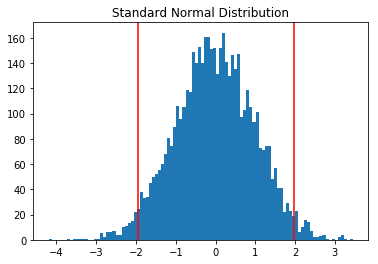

In [35]:
stdn_data = np.random.randn(5000)
stdn = plt.figure()
plt.hist(stdn_data, bins=100)
plt.axvline(x=-1.96, color = 'r')
plt.axvline(x=1.96, color = 'r')
plt.title('Standard Normal Distribution')
plt.show()

In [37]:
# load data
demo = pd.read_csv('county_demographics_2016.csv')
demo.head()

,fips,adult_pop,female_pop,male_pop,median_age,population,pct_poverty,median_income,pct_highschool,pct_unemployed
0,1001,41890.0,28422.0,26994.0,38.6,55416.0,13.5,54487.0,87.6,3.4
1,1003,163233.0,107322.0,101241.0,42.9,208563.0,11.7,56460.0,90.0,3.7
2,1005,20477.0,12186.0,13779.0,40.1,25965.0,29.9,32884.0,73.8,6.2
3,1007,17944.0,10498.0,12145.0,39.6,22643.0,20.1,43079.0,80.7,3.5
4,1009,44322.0,29206.0,28498.0,41.1,57704.0,14.1,47213.0,80.0,3.0


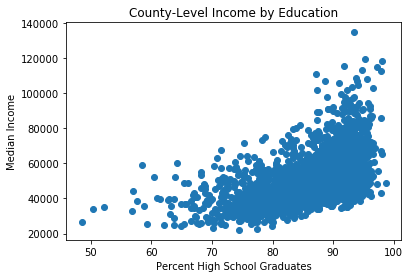

In [44]:
inc_edu = plt.figure()
plt.scatter(demo['pct_highschool'], demo['median_income'])
plt.title("County-Level Income by Education")
plt.xlabel('Percent High School Graduates')
plt.ylabel('Median Income')
plt.show()

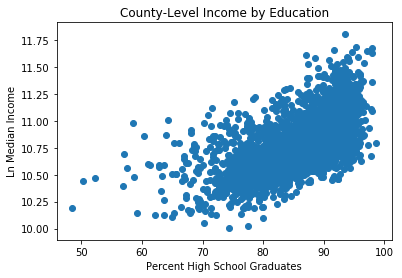

In [66]:

demo['median_income'].head()
np.log(demo['median_income'].head())

ln_inc_edu = plt.figure()
plt.scatter(demo['pct_highschool'], np.log(demo['median_income']))
plt.title("County-Level Income by Education")
plt.xlabel('Percent High School Graduates')
plt.ylabel('Ln Median Income')

plt.show()



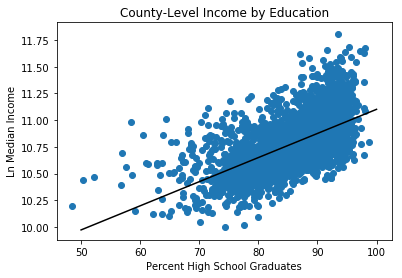

In [67]:

demo['median_income'].head()
np.log(demo['median_income'].head())

ln_inc_edu = plt.figure()
plt.scatter(demo['pct_highschool'], np.log(demo['median_income']))
plt.title("County-Level Income by Education")
plt.xlabel('Percent High School Graduates')
plt.ylabel('Ln Median Income')

x = np.linspace(50,100,100) # 100 linearly spaced numbers
y = 8.8415 +.0226*x
plt.plot(x , y, color = 'black')

plt.show()



In [47]:
# use .dropna() to drop rows with missing variables
demo = demo[['pct_highschool', 'median_income']].dropna()
demo.head()

,pct_highschool,median_income
0,87.6,54487.0
1,90.0,56460.0
2,73.8,32884.0
3,80.7,43079.0
4,80.0,47213.0


In [50]:
model = smf.ols(formula = 'np.log(median_income) ~ pct_highschool', data = demo)

est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(median_income)   R-squared:                       0.371
Model:                               OLS   Adj. R-squared:                  0.371
Method:                    Least Squares   F-statistic:                     1852.
Date:                   Wed, 06 Jun 2018   Prob (F-statistic):          2.20e-318
Time:                           11:31:51   Log-Likelihood:                 720.56
No. Observations:                   3140   AIC:                            -1437.
Df Residuals:                       3138   BIC:                            -1425.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8415      0.045    195.703      0.000       8.753       8.930
pct_highschool     0.0226      0.001     43.031      0.000       0.022       0.024
==============================================================================
Omnibus:                      310.224   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.689
Skew:                           0.769   Prob(JB):                     1.23e-96
Kurtosis:                       4.006   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""